In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
import json

In [3]:
table = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')
df = table[2]
df.to_csv('S&P100-Info.csv')
df.to_csv('S&P100-Symbols.csv')

In [4]:
ticker = pd.read_csv('S&P100-Symbols.csv', index_col = [1])

In [5]:
output = []

In [6]:
for ticker_symbol, name in ticker.iterrows():
    print(ticker_symbol)
    api_request = requests.get("https://cloud.iexapis.com/stable/stock/"+ str(ticker_symbol) +"/quote?token=pk_29bf2f219dd24afab263d4601c549e5c")
    api = json.loads(api_request.content)
    output.append(api)

AAPL
ABBV
ABT
ACN
ADBE
AGN
AIG
ALL
AMGN
AMZN
AXP
BA
BAC
BIIB
BK
BKNG
BLK
BMY
BRK.B
C
CAT
CHTR
CL
CMCSA
COF
COP
COST
CSCO
CVS
CVX
DD
DHR
DIS
DOW
DUK
EMR
EXC
F
FB
FDX
GD
GE
GILD
GM
GOOG
GOOGL
GS
HD
HON
IBM
INTC
JNJ
JPM
KHC
KMI
KO
LLY
LMT
LOW
MA
MCD
MDLZ
MDT
MET
MMM
MO
MRK
MS
MSFT
NEE
NFLX
NKE
NVDA
ORCL
OXY
PEP
PFE
PG
PM
PYPL
QCOM
RTN
SBUX
SLB
SO
SPG
T
TGT
TMO
TXN
UNH
UNP
UPS
USB
UTX
V
VZ
WBA
WFC
WMT
XOM


In [7]:
output

[{'symbol': 'AAPL',
  'companyName': 'Apple, Inc.',
  'primaryExchange': 'NASDAQ',
  'calculationPrice': 'close',
  'open': 279.82,
  'openTime': 1576593000469,
  'close': 280.41,
  'closeTime': 1576616400576,
  'high': 281.77,
  'low': 278.8,
  'latestPrice': 280.41,
  'latestSource': 'Close',
  'latestTime': 'December 17, 2019',
  'latestUpdate': 1576616400576,
  'latestVolume': 28967999,
  'iexRealtimePrice': 280.45,
  'iexRealtimeSize': 2,
  'iexLastUpdated': 1576616395010,
  'delayedPrice': 280.21,
  'delayedPriceTime': 1576619126037,
  'extendedPrice': 280.36,
  'extendedChange': -0.05,
  'extendedChangePercent': -0.00018,
  'extendedPriceTime': 1576630796636,
  'previousClose': 279.86,
  'previousVolume': 32081105,
  'change': 0.55,
  'changePercent': 0.00197,
  'volume': 28967999,
  'iexMarketPercent': 0.014290389888511112,
  'iexVolume': 413964,
  'avgTotalVolume': 23566116,
  'iexBidPrice': 0,
  'iexBidSize': 0,
  'iexAskPrice': 0,
  'iexAskSize': 0,
  'marketCap': 1245937340

In [8]:
dfOutput= pd.DataFrame(output)

In [9]:
dfOutput.to_csv('IEX_data.csv')

In [10]:
dfCap= dfOutput[['companyName','marketCap']]

In [11]:
dfCap

,companyName,marketCap
0,"Apple, Inc.",1245937340700
1,"AbbVie, Inc.",133212105600
2,Abbott Laboratories,153869844000
3,Accenture Plc,133622816400
4,"Adobe, Inc.",156284905150
...,...,...
96,"Verizon Communications, Inc.",254309112200
97,"Walgreens Boots Alliance, Inc.",50695177830
98,Wells Fargo & Co.,229823422400
99,"Walmart, Inc.",344093190400


In [12]:
dfCap= dfCap.sort_values(by='marketCap',ascending = False)

In [13]:
dfCap = dfCap.set_index('companyName')

In [14]:
dfCap.to_csv('dfCap.csv')


In [1]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [2]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2019,1,1)

In [22]:
apple = web.DataReader('AAPL','yahoo',start,end)

In [23]:
msft= web.DataReader('MSFT','yahoo',start,end)

In [24]:
goog= web.DataReader('GOOG','yahoo',start,end)

In [25]:
googl= web.DataReader('GOOGL','yahoo',start,end)

In [26]:
amazon = web.DataReader('AMZN','yahoo',start,end)

In [27]:
fb = web.DataReader('FB','yahoo',start,end)

In [28]:
berk= web.DataReader('BRK-A','yahoo',start,end)

In [29]:
jp= web.DataReader('JPM','yahoo',start,end)

In [30]:
jnj = web.DataReader('JNJ','yahoo',start,end)

In [45]:
visa = web.DataReader('V','yahoo',start,end)

In [44]:
apple

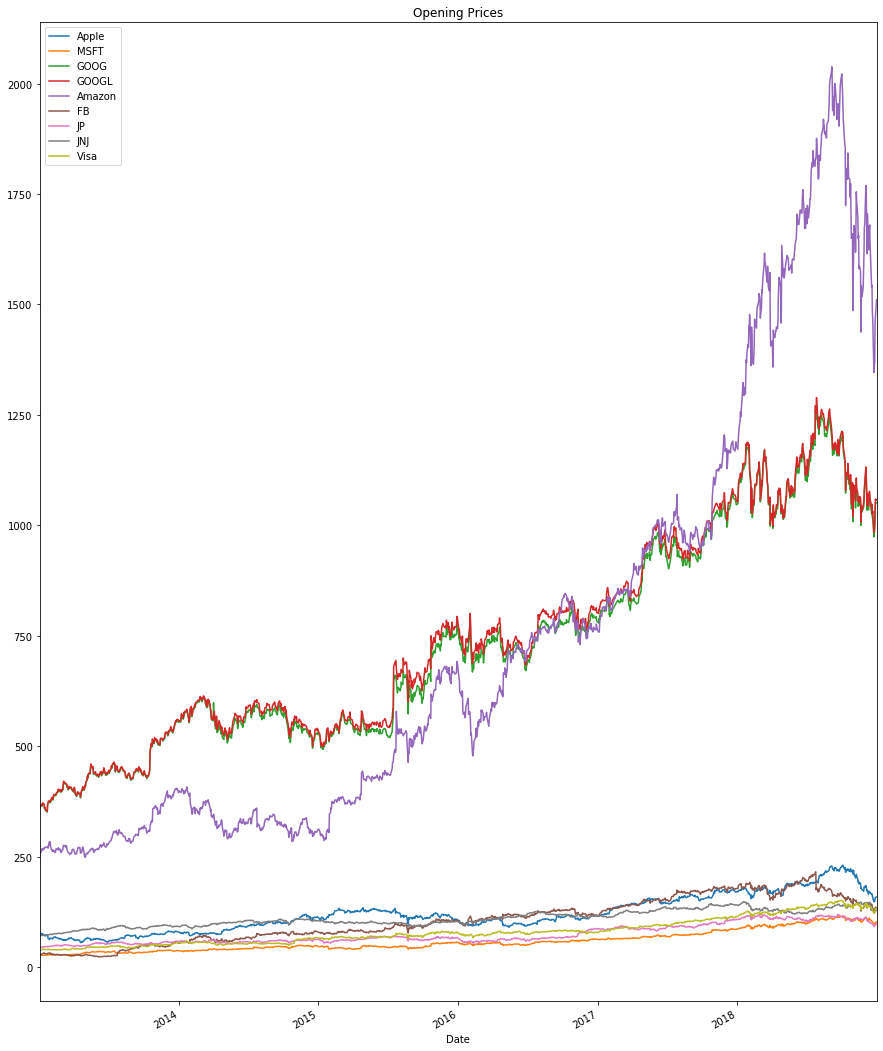

In [28]:
apple['Open'].plot(label='Apple',figsize = (15,20), title = 'Opening Prices')
msft['Open'].plot(label='MSFT') 
goog['Open'].plot(label='GOOG')
googl['Open'].plot(label='GOOGL')
amazon['Open'].plot(label='Amazon')
fb['Open'].plot(label='FB')
jp['Open'].plot(label='JP')
jnj['Open'].plot(label='JNJ')
visa['Open'].plot(label='Visa')
plt.legend();

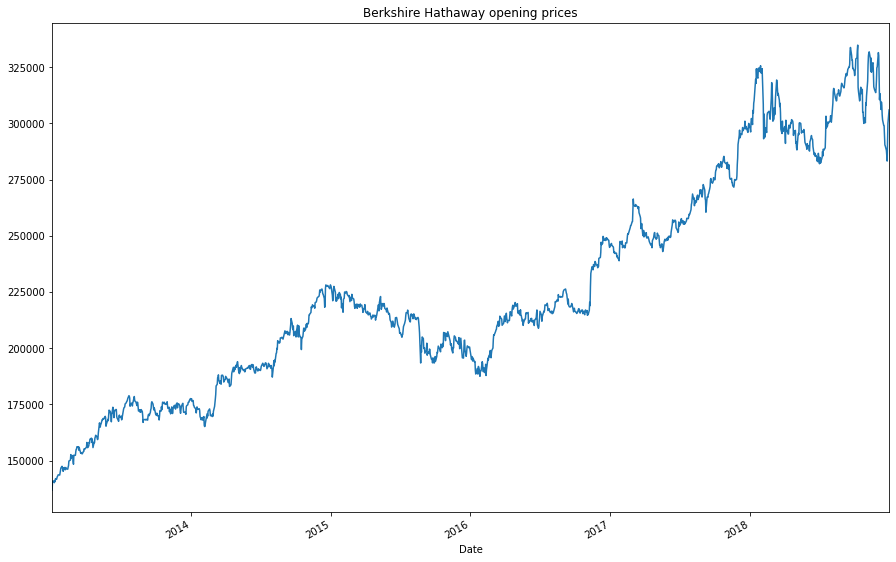

In [29]:
berk['Open'].plot(figsize = (15,10), title = 'Berkshire Hathaway opening prices')

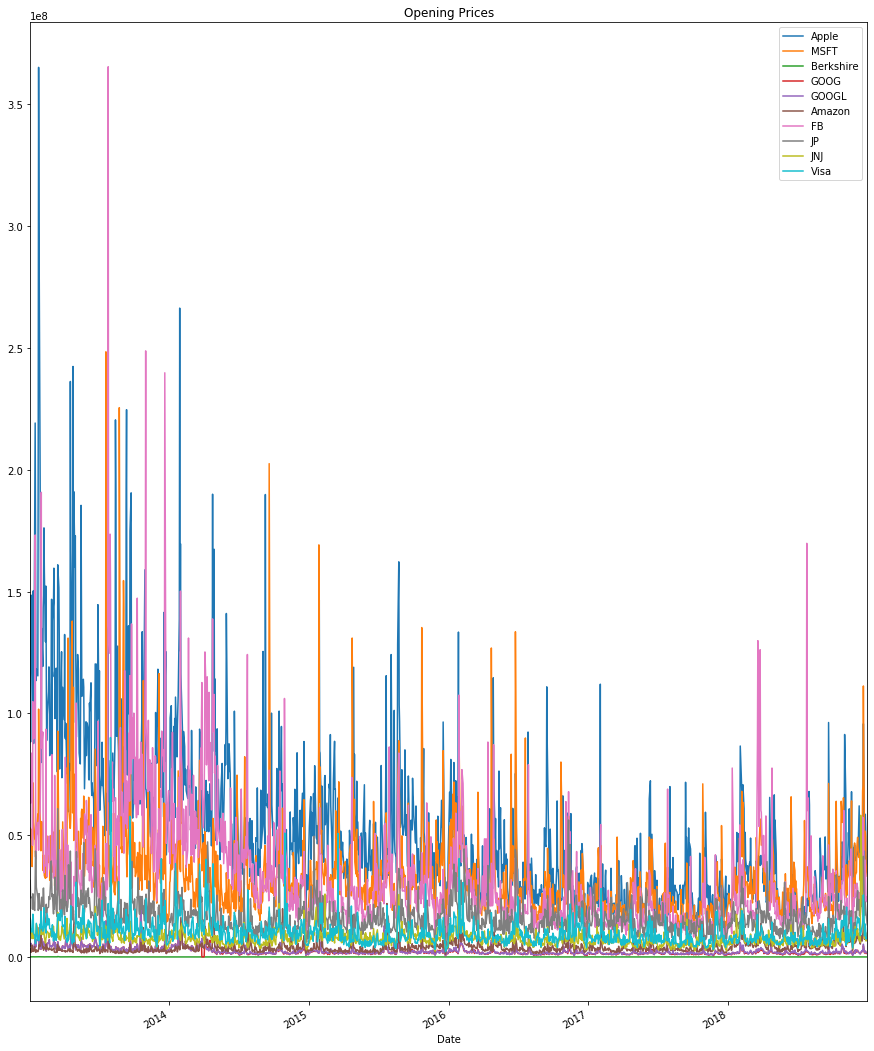

In [30]:
apple['Volume'].plot(label='Apple',figsize = (15,20), title = 'Opening Prices')
msft['Volume'].plot(label='MSFT')
berk['Volume'].plot(label='Berkshire')
goog['Volume'].plot(label='GOOG')
googl['Volume'].plot(label='GOOGL')
amazon['Volume'].plot(label='Amazon')
fb['Volume'].plot(label='FB')
jp['Volume'].plot(label='JP')
jnj['Volume'].plot(label='JNJ')
visa['Volume'].plot(label='Visa')

plt.legend();

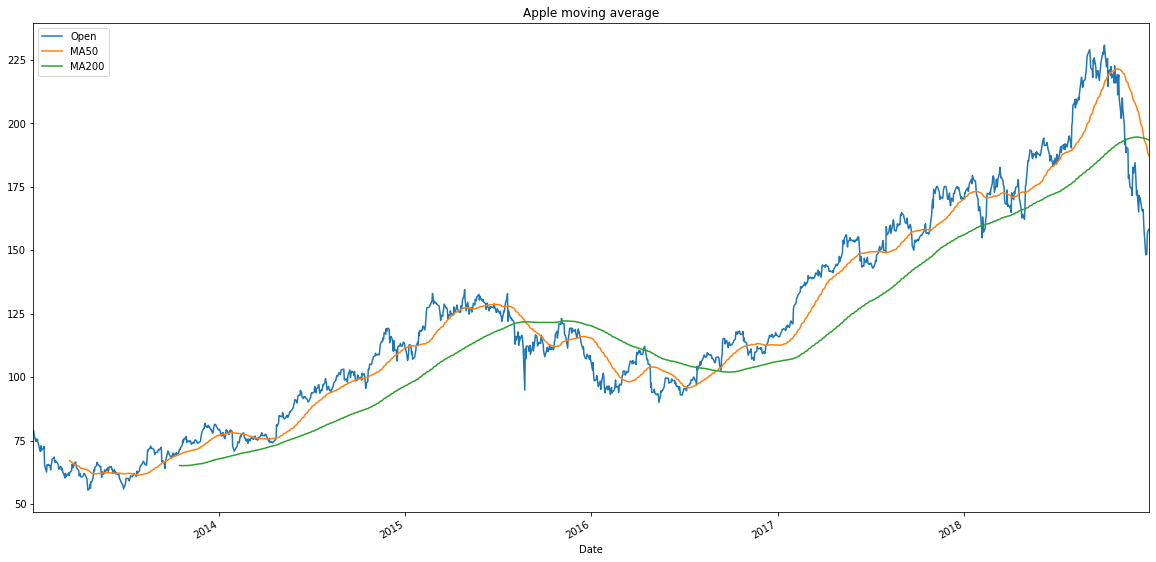

In [31]:
apple['MA50'] = apple['Open'].rolling(50).mean()
apple['MA200'] = apple['Open'].rolling(200).mean()
apple[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Apple moving average")

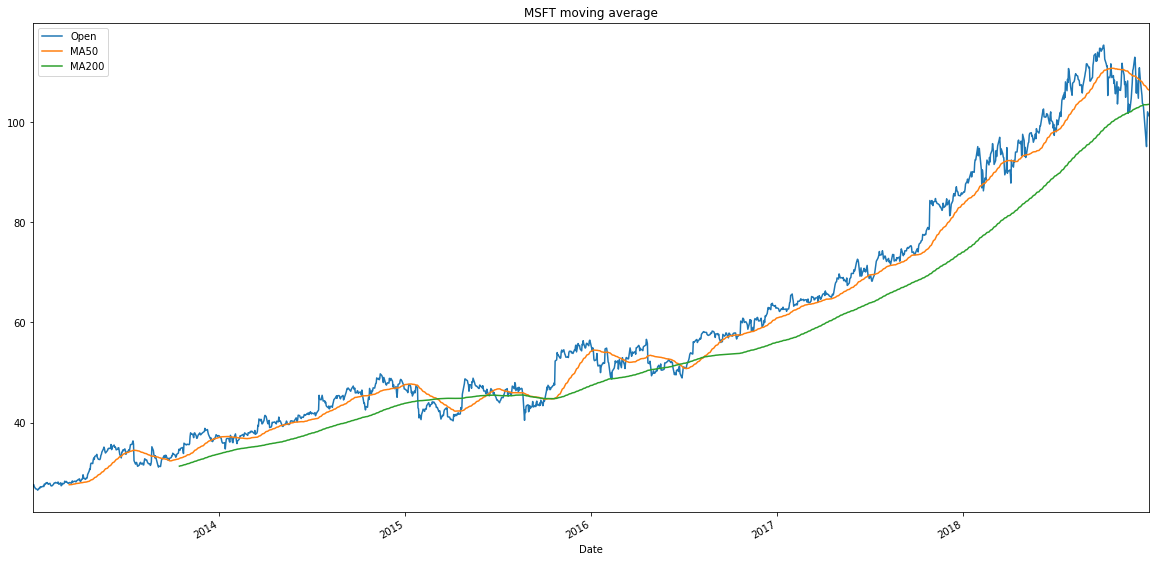

In [32]:
msft['MA50'] = msft['Open'].rolling(50).mean()
msft['MA200'] = msft['Open'].rolling(200).mean()
msft[['Open','MA50','MA200']].plot(figsize= (20,10),title = "MSFT moving average")

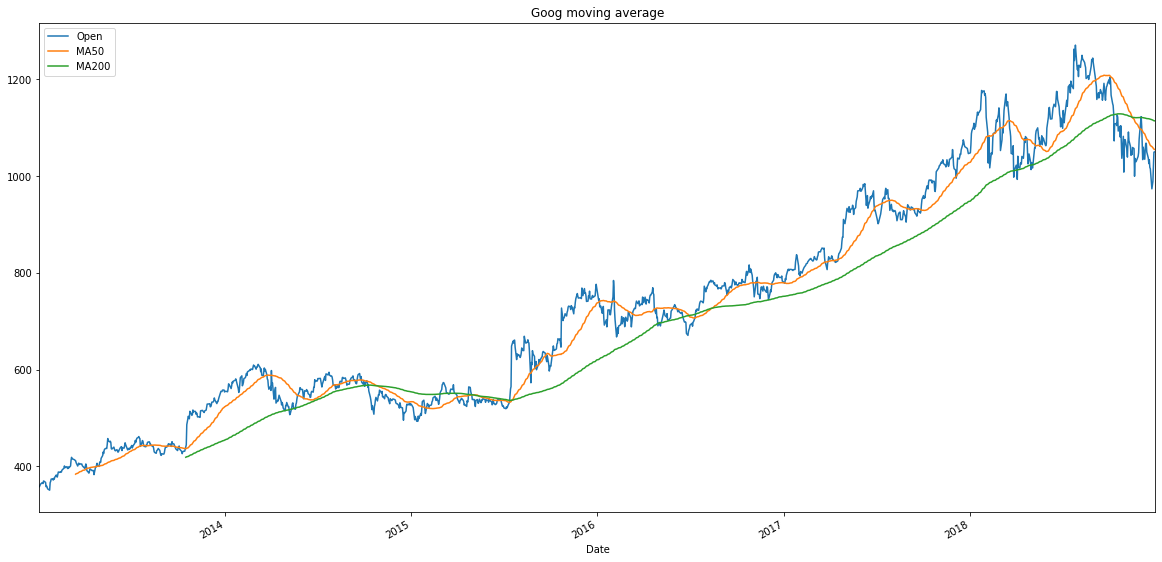

In [33]:
goog['MA50'] = goog['Open'].rolling(50).mean()
goog['MA200'] = goog['Open'].rolling(200).mean()
goog[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Goog moving average")

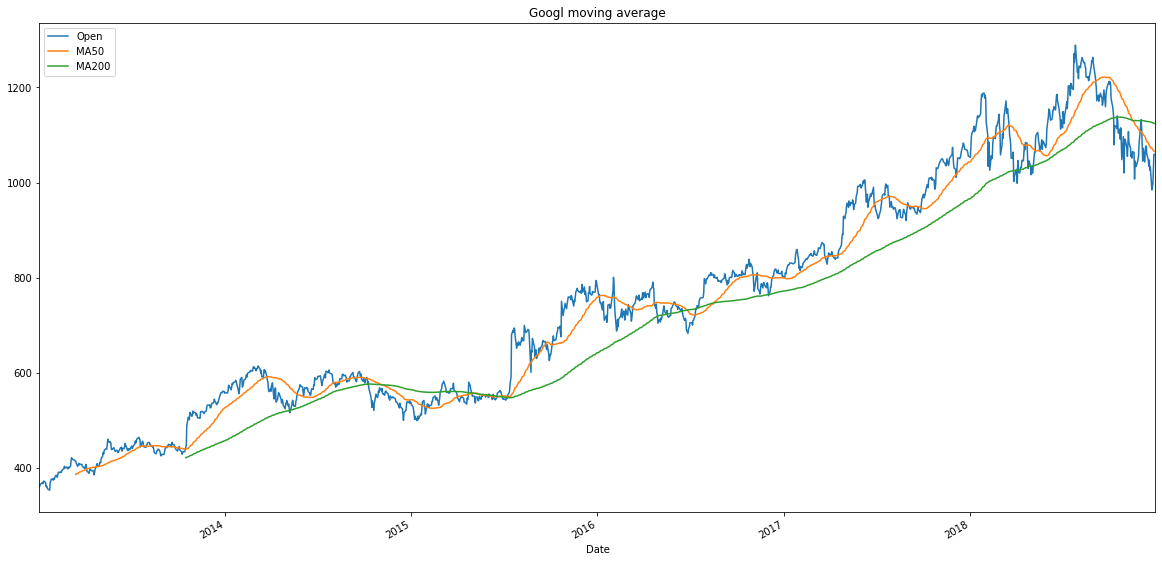

In [34]:
googl['MA50'] = googl['Open'].rolling(50).mean()
googl['MA200'] = googl['Open'].rolling(200).mean()
googl[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Googl moving average")

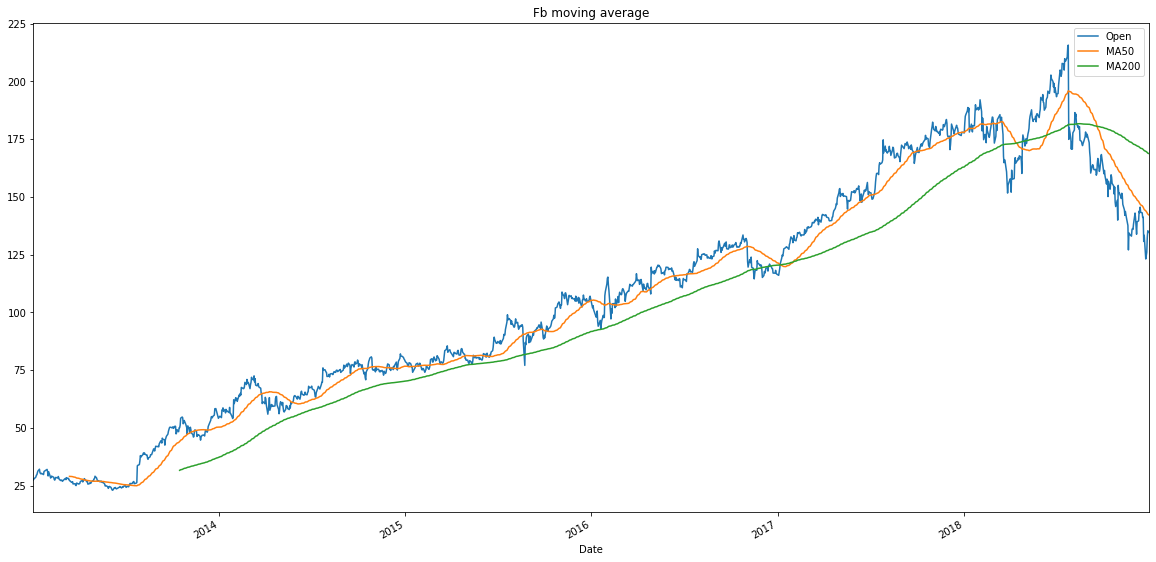

In [35]:
fb['MA50'] = fb['Open'].rolling(50).mean()
fb['MA200'] =fb['Open'].rolling(200).mean()
fb[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Fb moving average")

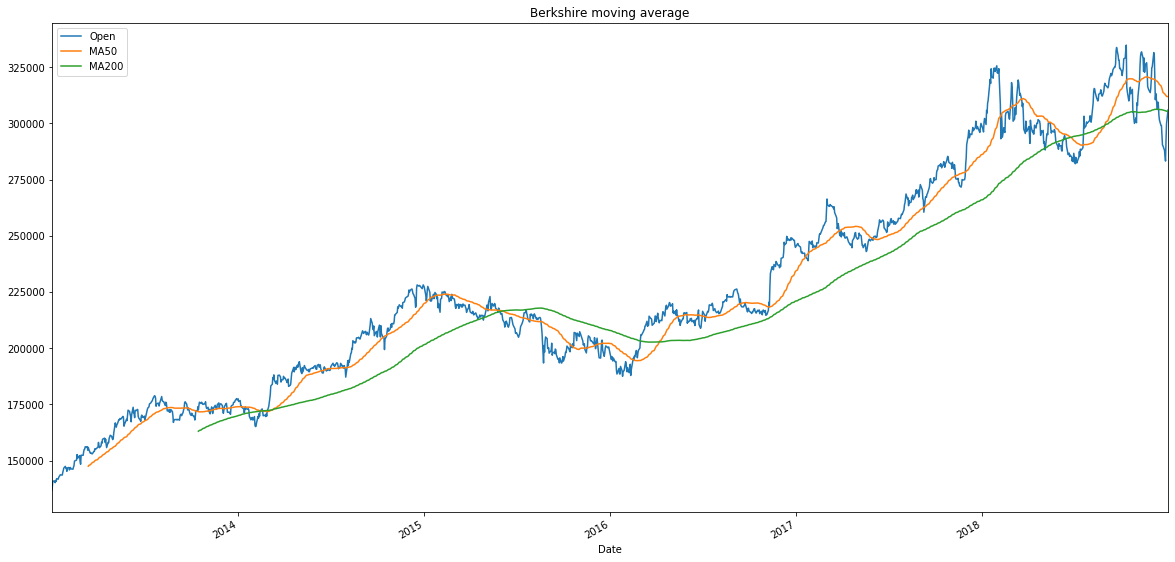

In [36]:
berk['MA50'] = berk['Open'].rolling(50).mean()
berk['MA200'] = berk['Open'].rolling(200).mean()
berk[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Berkshire moving average")

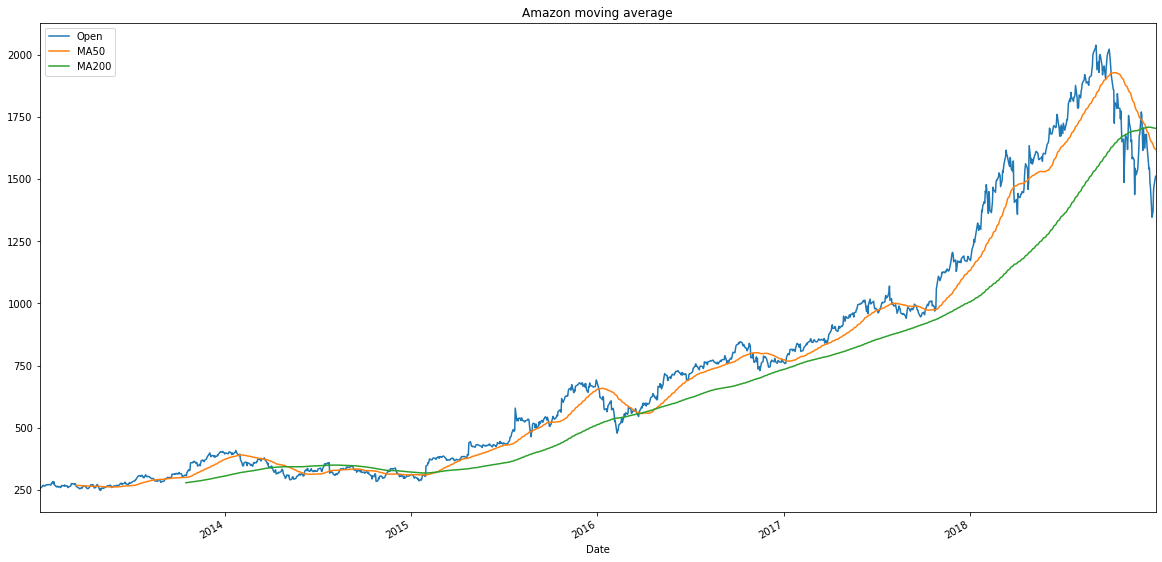

In [37]:
amazon['MA50'] = amazon['Open'].rolling(50).mean()
amazon['MA200'] = amazon['Open'].rolling(200).mean()
amazon[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Amazon moving average")

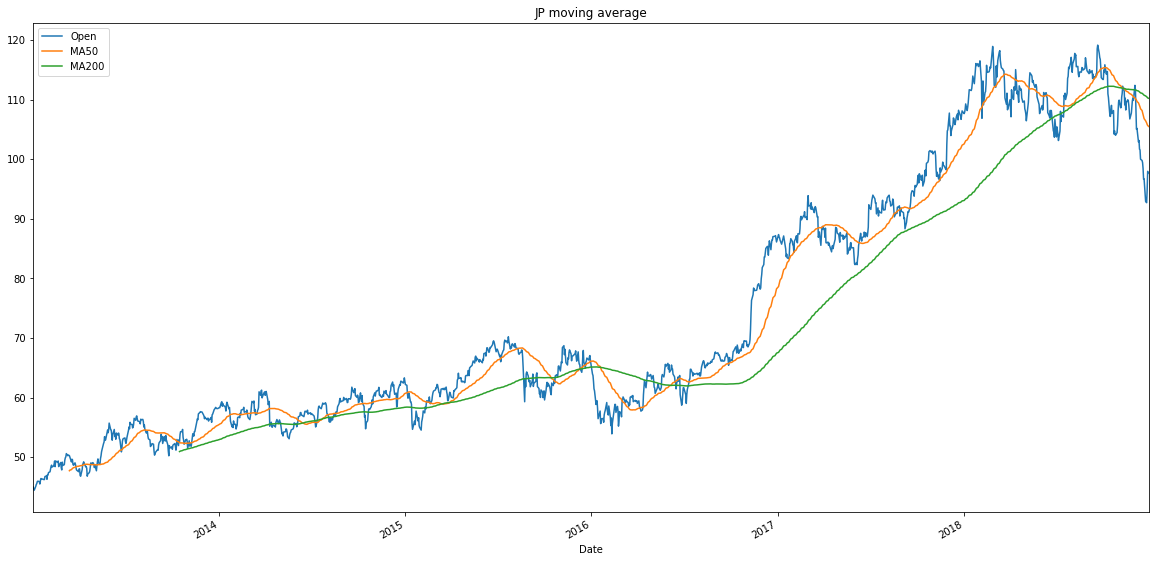

In [38]:
jp['MA50'] = jp['Open'].rolling(50).mean()
jp['MA200'] = jp['Open'].rolling(200).mean()
jp[['Open','MA50','MA200']].plot(figsize= (20,10),title = "JP moving average")

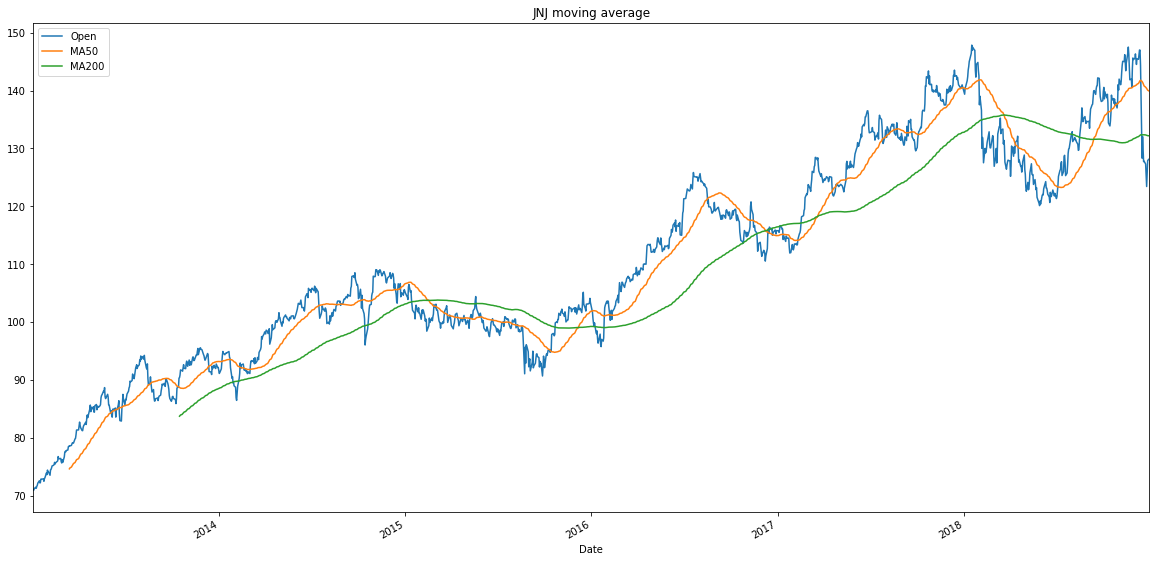

In [39]:
jnj['MA50'] = jnj['Open'].rolling(50).mean()
jnj['MA200'] = jnj['Open'].rolling(200).mean()
jnj[['Open','MA50','MA200']].plot(figsize= (20,10),title = "JNJ moving average")

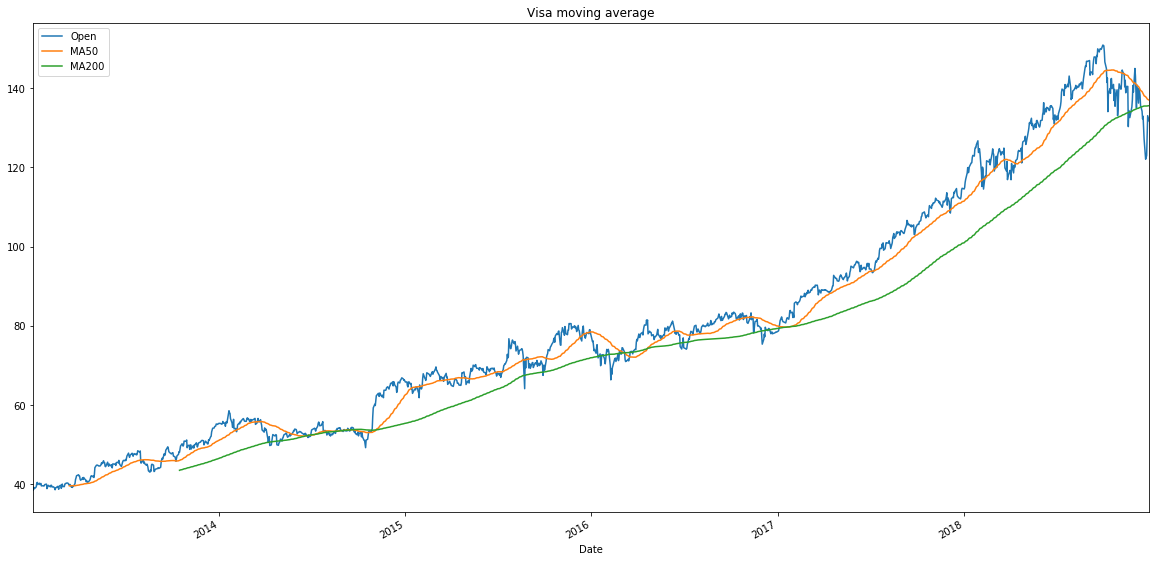

In [40]:
visa['MA50'] = visa['Open'].rolling(50).mean()
visa['MA200'] = visa['Open'].rolling(200).mean()
visa[['Open','MA50','MA200']].plot(figsize= (20,10),title = "Visa moving average")

In [41]:
from pandas.plotting import scatter_matrix

In [42]:
companies = pd.concat([apple["Open"],msft['Open'],berk['Open'],goog['Open'],googl['Open'],fb['Open'],amazon['Open'],jnj['Open'], jp['Open'],visa['Open']], axis = 1)

In [43]:
companies.columns = ["Apple Open", "Msft Open","Berkshire Open", "Goog Open", 'Googl Open','Fb Open' ,'Amazon Open','JNJ Open', 'JP Open', 'VisaOpen']

In [44]:
companies

,Apple Open,Msft Open,Berkshire Open,Goog Open,Googl Open,Fb Open,Amazon Open,JNJ Open,JP Open,VisaOpen
Date,,,,,,,,,,
2013-01-02,79.117142,27.250000,136850,358.366760,360.070068,27.440001,256.079987,71.019997,44.980000,38.540001
2013-01-03,78.268570,27.629999,140000,361.111481,362.827820,27.879999,257.269989,70.980003,44.740002,39.277500
2013-01-04,76.709999,27.270000,140879,363.308228,365.035034,28.010000,257.579987,71.239998,44.450001,38.900002
2013-01-07,74.571426,26.770000,140949,366.351837,368.093079,28.690001,262.970001,71.500000,45.090000,39.235001
2013-01-08,75.601425,26.750000,140195,366.396667,368.138153,29.510000,267.070007,71.309998,45.400002,39.412498
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,148.149994,97.680000,288000,973.900024,984.320007,123.099998,1346.000000,127.300003,92.889999,122.080002
2018-12-26,148.300003,95.139999,283250,989.010010,997.989990,126.000000,1368.890015,123.419998,92.690002,123.019997
2018-12-27,155.839996,99.300003,293000,1017.150024,1026.199951,132.440002,1454.199951,125.870003,94.820000,127.989998


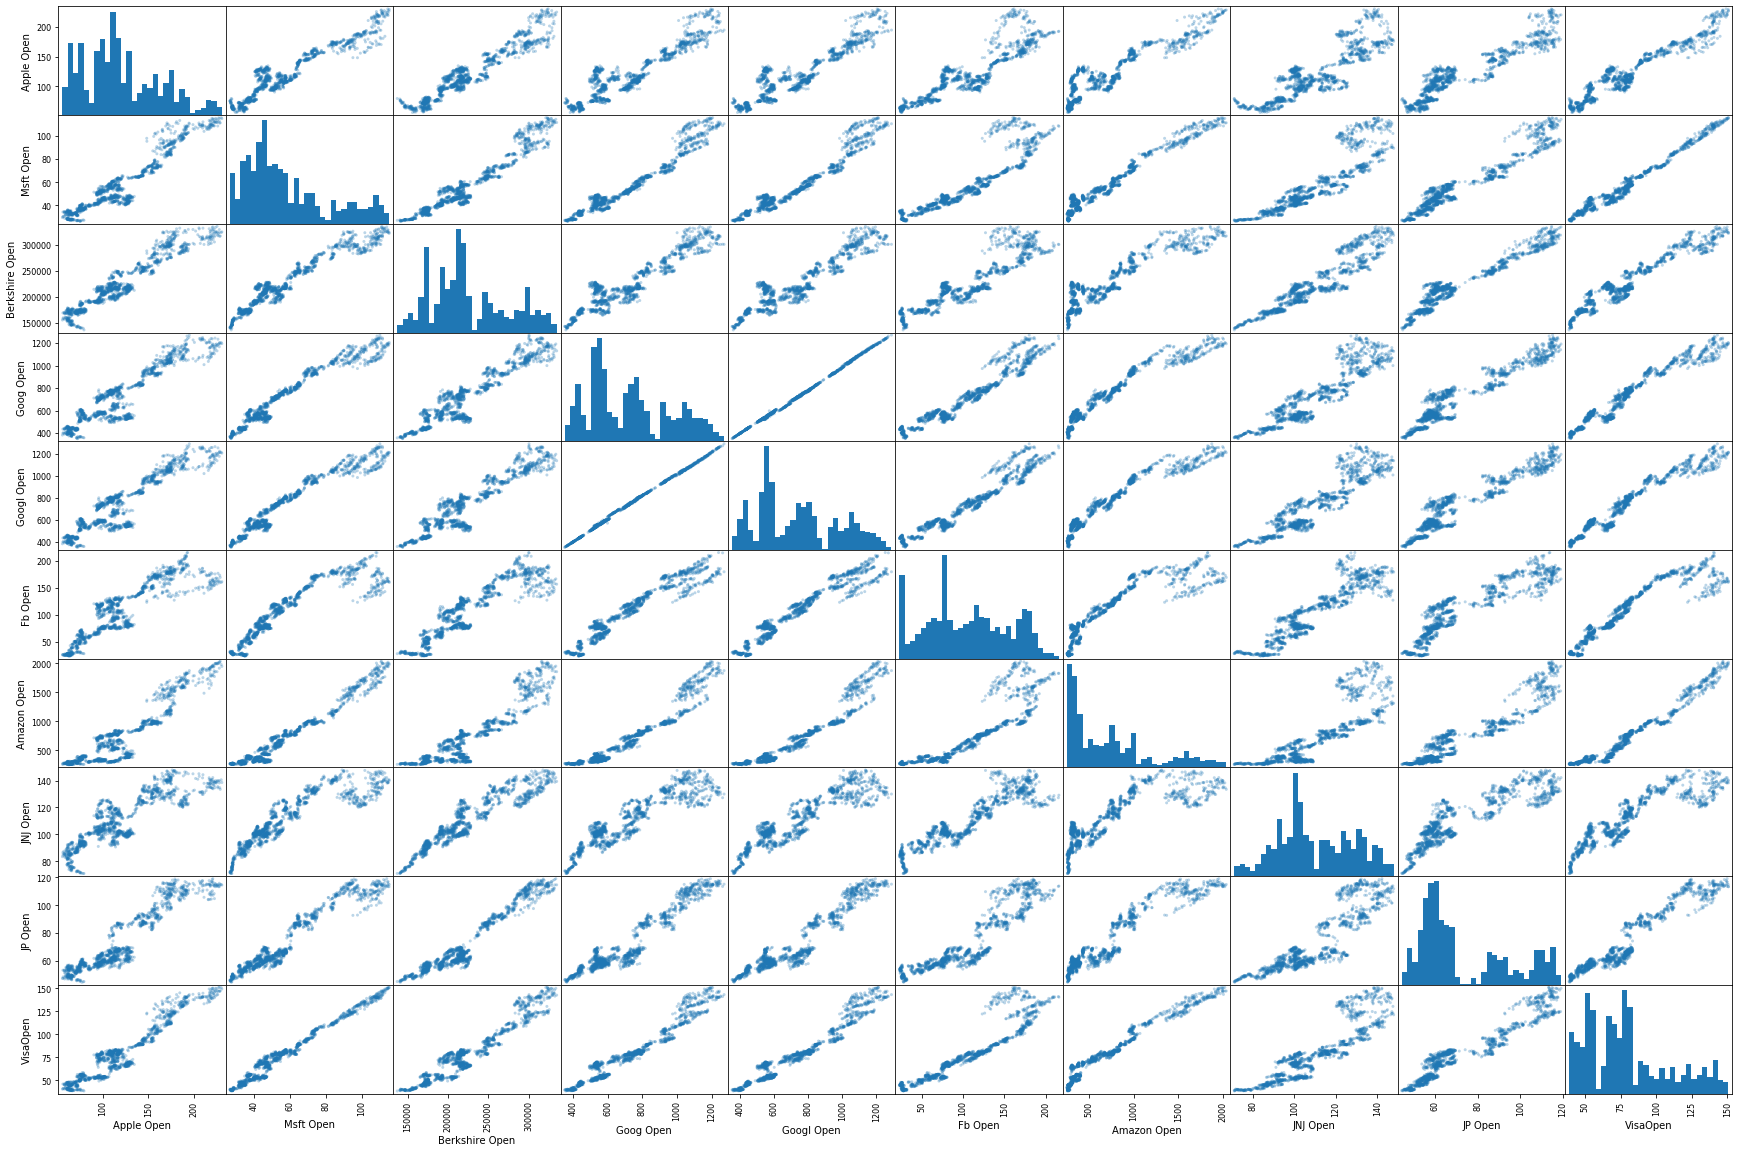

In [45]:
scatter_matrix(companies, figsize = (30,20), alpha = 0.3,hist_kwds = {'bins': 30});

In [46]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [47]:
appleOHLC = apple.loc['2018-12'].reset_index()

In [48]:
appleOHLC

,Date,High,Low,Open,Close,Volume,Adj Close,MA50,MA200
0,2018-12-03,184.940002,181.210007,184.460007,184.820007,40802500.0,182.084183,208.129001,194.520851
1,2018-12-04,182.389999,176.270004,180.949997,176.690002,41344300.0,174.074539,207.411600,194.565351
2,2018-12-06,174.779999,170.419998,171.759995,174.720001,43098400.0,172.133682,206.451800,194.560001
3,2018-12-07,174.490005,168.300003,173.490005,168.490005,42281600.0,165.995926,205.501600,194.568451
4,2018-12-10,170.089996,163.330002,165.000000,169.600006,62026000.0,167.089478,204.325200,194.525101
5,2018-12-11,171.789993,167.000000,171.660004,168.630005,47281700.0,166.133850,203.262600,194.501651
6,2018-12-12,171.919998,169.020004,170.399994,169.100006,35627700.0,166.596878,202.111600,194.458150
7,2018-12-13,172.570007,169.550003,170.490005,170.949997,31898600.0,168.419479,200.976400,194.414301
8,2018-12-14,169.080002,165.279999,169.000000,165.479996,40703700.0,163.030457,199.755400,194.366601
9,2018-12-17,168.350006,162.729996,165.449997,163.940002,44287900.0,161.513260,198.448800,194.329851


In [49]:
appleOHLC['date_ax'] = appleOHLC['Date'].apply(lambda date:date2num(date))

In [50]:
colmns=['date_ax', 'Open','High', 'Low', 'Close']
appleOHLC_values = [tuple(vals) for vals in appleOHLC[colmns].values]

In [51]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter("%b %d")
dayFormatter = DateFormatter("%d")

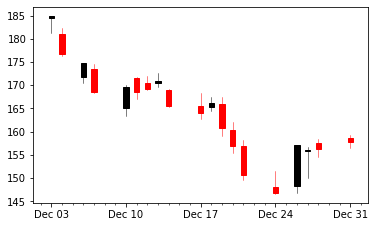

In [52]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom = 0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,appleOHLC_values,width = 0.5);

In [53]:
apple['returns'] = apple['Close'].pct_change(1)
msft['returns'] = msft['Close'].pct_change(1)
goog['returns'] = goog['Close'].pct_change(1)
googl['returns'] = googl['Close'].pct_change(1)
berk['returns'] = berk['Close'].pct_change(1)
fb['returns'] = fb['Close'].pct_change(1)
amazon['returns'] = amazon['Close'].pct_change(1)
jp['returns'] = jp['Close'].pct_change(1)
jnj['returns'] = jnj['Close'].pct_change(1)
visa['returns'] = visa['Close'].pct_change(1)

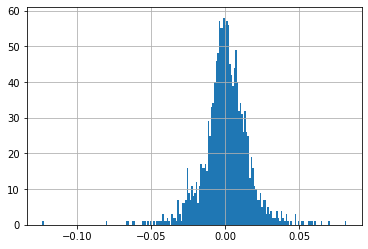

In [54]:
apple['returns'].hist(bins=200);

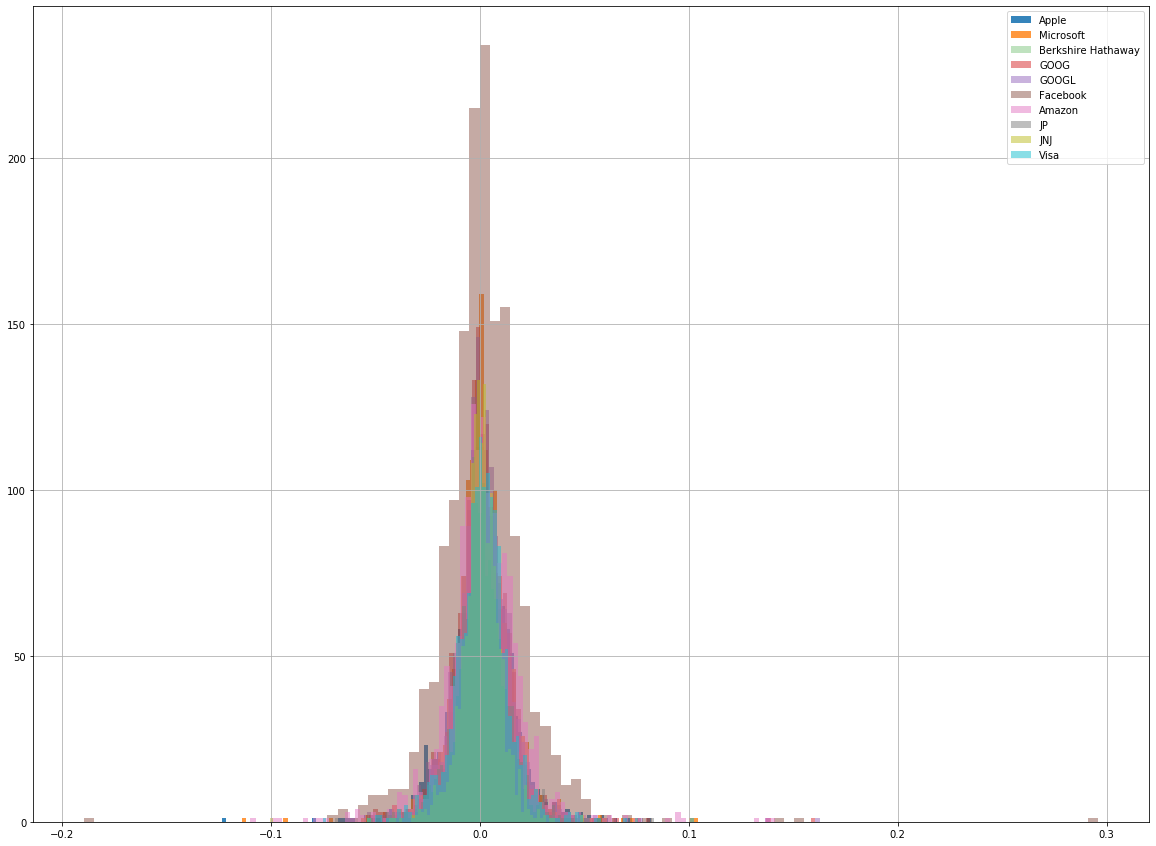

In [55]:
apple['returns'].hist(bins=100,label = 'Apple',figsize = (20,15), alpha = 0.9);
msft['returns'].hist(bins=100,label = 'Microsoft',figsize = (20,15), alpha = 0.8);
berk['returns'].hist(bins=100,label = 'Berkshire Hathaway',figsize = (20,15), alpha = 0.3);
goog['returns'].hist(bins=100,label = 'GOOG',figsize = (20,15), alpha = 0.5);
googl['returns'].hist(bins=100,label = 'GOOGL',figsize = (20,15), alpha = 0.5);
fb['returns'].hist(bins=100,label = 'Facebook',figsize = (20,15), alpha = 0.5);
amazon['returns'].hist(bins=100,label = 'Amazon',figsize = (20,15), alpha = 0.5);
jp['returns'].hist(bins=100,label = 'JP',figsize = (20,15), alpha = 0.5);
jnj['returns'].hist(bins=100,label = 'JNJ',figsize = (20,15), alpha = 0.5);
visa['returns'].hist(bins=100,label = 'Visa',figsize = (20,15), alpha = 0.5);
plt.legend()

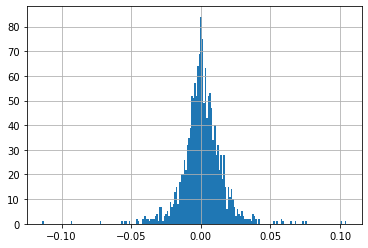

In [56]:
msft['returns'].hist(bins=200);

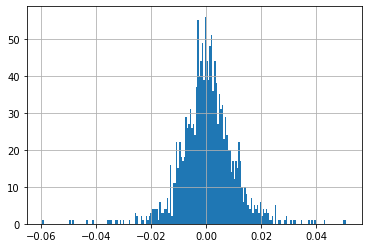

In [57]:
berk['returns'].hist(bins=200);

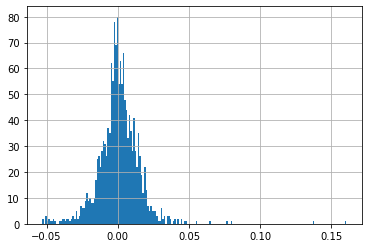

In [58]:
goog['returns'].hist(bins=200);

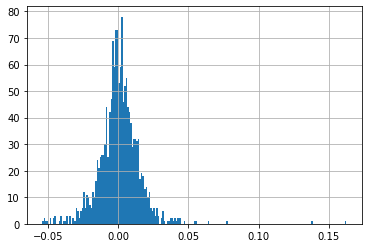

In [59]:
googl['returns'].hist(bins=200);

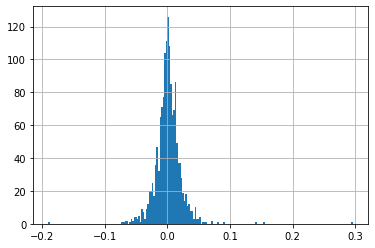

In [60]:
fb['returns'].hist(bins=200);

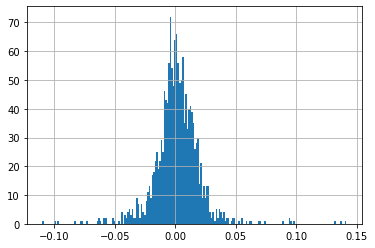

In [61]:
amazon['returns'].hist(bins=200);

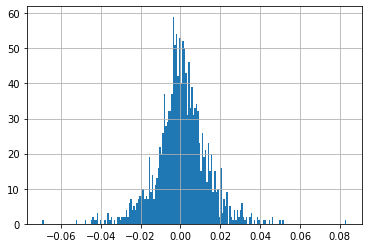

In [62]:
jp['returns'].hist(bins=200);

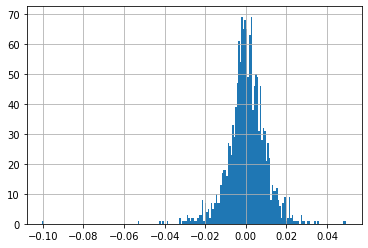

In [63]:
jnj['returns'].hist(bins=200);

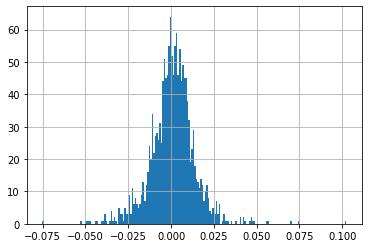

In [64]:
visa['returns'].hist(bins=200);

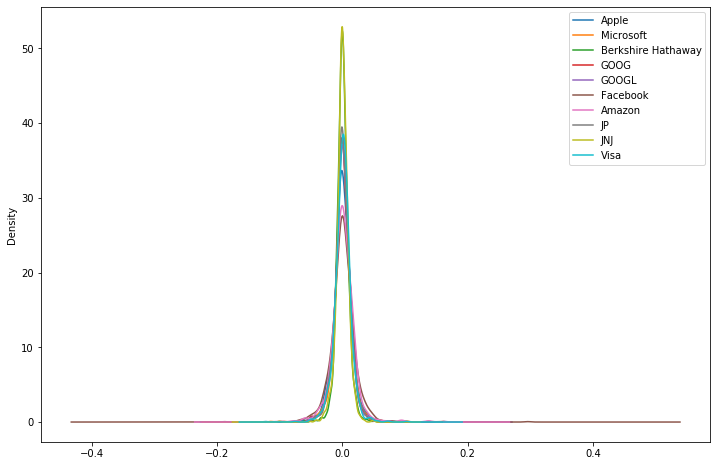

In [65]:
apple['returns'].plot(kind='kde',label = 'Apple',figsize = (12,8))
msft['returns'].plot(kind ='kde' ,label = 'Microsoft',figsize = (12,8))
berk['returns'].plot(kind='kde',label = 'Berkshire Hathaway',figsize = (12,8))
goog['returns'].plot(kind='kde',label = 'GOOG',figsize = (12,8))
googl['returns'].plot(kind='kde',label = 'GOOGL',figsize = (12,8))
fb['returns'].plot(kind='kde',label = 'Facebook',figsize = (12,8))
amazon['returns'].plot(kind='kde',label = 'Amazon',figsize = (12,8))
jp['returns'].plot(kind='kde',label = 'JP',figsize = (12,8))
jnj['returns'].plot(kind='kde',label = 'JNJ',figsize = (12,8))
visa['returns'].plot(kind='kde',label = 'Visa',figsize = (12,8))
plt.legend();

In [66]:
apple['Cumulative Return']= (1+apple['returns']).cumprod()

In [67]:
apple

,High,Low,Open,Close,Volume,Adj Close,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,68.850548,NaN,NaN,NaN,NaN
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,67.981491,NaN,NaN,-0.012622,0.987378
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,66.087891,NaN,NaN,-0.027855,0.959875
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,65.699158,NaN,NaN,-0.005882,0.954228
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,65.875954,NaN,NaN,0.002691,0.956797
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540,192.1088,193.90630,-0.025874,1.872047
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475,190.6664,193.74635,0.070422,2.003880
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562,189.3600,193.61260,-0.006490,1.990875


In [68]:
msft['Cumulative Return']= (1+msft['returns']).cumprod()
berk['Cumulative Return']= (1+berk['returns']).cumprod()
goog['Cumulative Return']= (1+goog['returns']).cumprod()
googl['Cumulative Return']= (1+googl['returns']).cumprod()
fb['Cumulative Return']= (1+fb['returns']).cumprod()
amazon['Cumulative Return']= (1+amazon['returns']).cumprod()
jp['Cumulative Return']= (1+jp['returns']).cumprod()
jnj['Cumulative Return']= (1+jnj['returns']).cumprod()
visa['Cumulative Return']= (1+visa['returns']).cumprod()

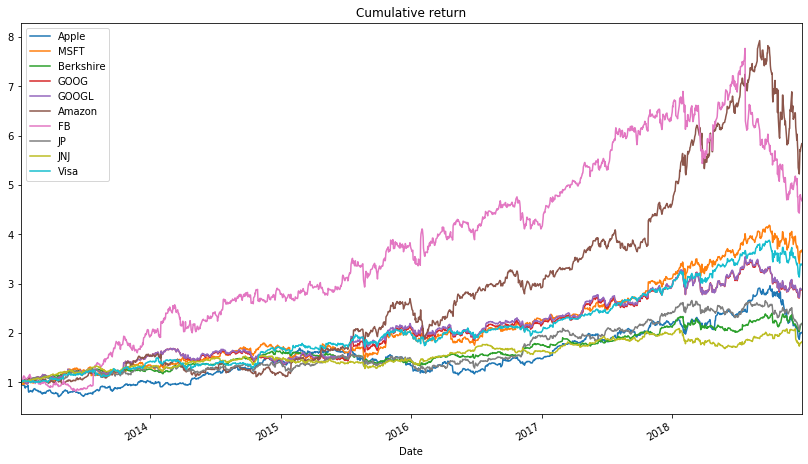

In [69]:
apple['Cumulative Return'].plot(label='Apple',figsize = (14,8), title = 'Cumulative return')
msft['Cumulative Return'].plot(label='MSFT')
berk['Cumulative Return'].plot(label='Berkshire')
goog['Cumulative Return'].plot(label='GOOG')
googl['Cumulative Return'].plot(label='GOOGL')
amazon['Cumulative Return'].plot(label='Amazon')
fb['Cumulative Return'].plot(label='FB')
jp['Cumulative Return'].plot(label='JP')
jnj['Cumulative Return'].plot(label='JNJ')
visa['Cumulative Return'].plot(label='Visa')

plt.legend();